In [1]:
import pandas as pd
import numpy as np

from tqdm import tqdm
tqdm.pandas()

from pathlib import Path

import sys
sys.path.insert(0, os.path.abspath('../src'))

from utils import *
from plots import *

In [2]:
data_path = "../data"

In [3]:
DataDownloader(data_path).download_all_csv()

In [4]:
covidpro_df, dpc_regioni_df, dpc_province_df, pop_prov_df, prov_list_df = load_data(data_path)

In [5]:
covidpro_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26023 entries, 0 to 26022
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id_prov         26023 non-null  int64         
 1   Province        26023 non-null  object        
 2   Date            26023 non-null  datetime64[ns]
 3   Deaths          26023 non-null  int64         
 4   Tot_deaths      26023 non-null  int64         
 5   New_cases       26023 non-null  int64         
 6   Curr_pos_cases  26023 non-null  int64         
 7   Region          26023 non-null  object        
 8   id_reg          26023 non-null  int64         
 9   NP_R            26023 non-null  float64       
 10  DR              26023 non-null  float64       
 11  NP_R_Rolling    26023 non-null  float64       
 12  DR_Rolling      26023 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(6), object(2)
memory usage: 2.6+ MB


In [6]:
covidpro_df.head()

,id_prov,Province,Date,Deaths,Tot_deaths,New_cases,Curr_pos_cases,Region,id_reg,NP_R,DR,NP_R_Rolling,DR_Rolling
0,84,Agrigento,2020-02-24,0,0,0,0,Sicilia,19,0.0,0.0,0.0,0.0
1,6,Alessandria,2020-02-24,0,0,0,0,Piemonte,1,0.0,0.0,0.0,0.0
2,42,Ancona,2020-02-24,0,0,0,0,Marche,11,0.0,0.0,0.0,0.0
3,7,Aosta,2020-02-24,0,0,0,0,Valle d'Aosta,2,0.0,0.0,0.0,0.0
4,51,Arezzo,2020-02-24,0,0,0,0,Toscana,9,0.0,0.0,0.0,0.0


In [7]:
covidpro_df.tail()

,id_prov,Province,Date,Deaths,Tot_deaths,New_cases,Curr_pos_cases,Region,id_reg,NP_R,DR,NP_R_Rolling,DR_Rolling
26018,2,Vercelli,2020-12-05,0,313,44,6666,Piemonte,1,0.006601,0.0,0.014791,0.0
26019,23,Verona,2020-12-05,0,627,793,30485,Veneto,5,0.026013,0.0,0.017716,0.0
26020,102,Vibo Valentia,2020-12-05,0,21,5,980,Calabria,18,0.005102,0.0,0.013695,0.0
26021,24,Vicenza,2020-12-05,0,536,448,28616,Veneto,5,0.015656,0.0,0.011873,0.0
26022,56,Viterbo,2020-12-05,0,157,21,7162,Lazio,12,0.002932,0.0,0.011261,0.0


In [8]:
dpc_regioni_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6006 entries, 0 to 6005
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   data                          6006 non-null   datetime64[ns]
 1   stato                         6006 non-null   object        
 2   codice_regione                6006 non-null   int64         
 3   denominazione_regione         6006 non-null   object        
 4   lat                           6006 non-null   float64       
 5   long                          6006 non-null   float64       
 6   ricoverati_con_sintomi        6006 non-null   int64         
 7   terapia_intensiva             6006 non-null   int64         
 8   totale_ospedalizzati          6006 non-null   int64         
 9   isolamento_domiciliare        6006 non-null   int64         
 10  totale_positivi               6006 non-null   int64         
 11  variazione_totale_positivi    

In [9]:
dpc_regioni_df.head()

,data,stato,codice_regione,denominazione_regione,lat,long,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,...,casi_testati,note,NC_R,NP_R,IC_R,Hosp_R,DR,NC_R_Rolling,IC_R_Rolling,totale_positivi_Rolling
0,2020-02-24 18:00:00,ITA,13,Abruzzo,42.351222,13.398438,0,0,0,0,...,0.0,0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
1,2020-02-24 18:00:00,ITA,17,Basilicata,40.639471,15.805148,0,0,0,0,...,0.0,0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
2,2020-02-24 18:00:00,ITA,18,Calabria,38.905976,16.594402,0,0,0,0,...,0.0,0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
3,2020-02-24 18:00:00,ITA,15,Campania,40.839566,14.250850,0,0,0,0,...,0.0,0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
4,2020-02-24 18:00:00,ITA,8,Emilia-Romagna,44.494367,11.341721,10,2,12,6,...,0.0,0,0.121622,1.0,0.111111,0.666667,0.0,0.0,0.0,3.6


In [10]:
dpc_regioni_df.tail()

,data,stato,codice_regione,denominazione_regione,lat,long,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,...,casi_testati,note,NC_R,NP_R,IC_R,Hosp_R,DR,NC_R_Rolling,IC_R_Rolling,totale_positivi_Rolling
6001,2020-12-05 17:00:00,ITA,19,Sicilia,38.115697,13.362357,1400,215,1615,37925,...,687039.0,0,0.001223,0.031361,0.005438,0.040845,0.043576,0.001224,0.007893,33567.8
6002,2020-12-05 17:00:00,ITA,9,Toscana,43.769231,11.255889,1373,261,1634,28910,...,979295.0,0,0.000471,0.025177,0.008545,0.053497,0.092948,0.001203,0.005791,39172.8
6003,2020-12-05 17:00:00,ITA,10,Umbria,43.106758,12.388247,330,61,391,5758,...,230476.0,0,0.000519,0.036754,0.009920,0.063588,0.073345,0.001131,0.006679,27050.0
6004,2020-12-05 17:00:00,ITA,2,Valle d'Aosta,45.737503,7.320149,107,9,116,940,...,34511.0,0,0.000826,0.043561,0.008523,0.109848,0.312500,0.000844,0.007387,18429.2
6005,2020-12-05 17:00:00,ITA,5,Veneto,45.434905,12.338452,2489,312,2801,72157,...,1086461.0,Nei valori riportati per le terapie intensive ...,0.001256,0.048120,0.004162,0.037368,0.055671,0.000859,0.007318,30449.4


In [12]:
dpc_province_df.head()

,data,stato,codice_regione,denominazione_regione,codice_provincia,denominazione_provincia,sigla_provincia,lat,long,totale_casi,note
0,2020-02-24 18:00:00,ITA,13,Abruzzo,66,L'Aquila,AQ,42.351222,13.398438,0,0
1,2020-02-24 18:00:00,ITA,13,Abruzzo,67,Teramo,TE,42.658918,13.704400,0,0
2,2020-02-24 18:00:00,ITA,13,Abruzzo,68,Pescara,PE,42.464584,14.213648,0,0
3,2020-02-24 18:00:00,ITA,13,Abruzzo,69,Chieti,CH,42.351032,14.167546,0,0
4,2020-02-24 18:00:00,ITA,13,Abruzzo,979,In fase di definizione/aggiornamento,0,0.000000,0.000000,0,0


In [13]:
dpc_province_df.tail()

,data,stato,codice_regione,denominazione_regione,codice_provincia,denominazione_provincia,sigla_provincia,lat,long,totale_casi,note
40047,2020-12-05 17:00:00,ITA,5,Veneto,27,Venezia,VE,45.434905,12.338452,23580,0
40048,2020-12-05 17:00:00,ITA,5,Veneto,28,Padova,PD,45.406930,11.876087,30541,0
40049,2020-12-05 17:00:00,ITA,5,Veneto,29,Rovigo,RO,45.071073,11.790070,4406,0
40050,2020-12-05 17:00:00,ITA,5,Veneto,899,Fuori Regione / Provincia Autonoma,0,0.000000,0.000000,2787,0
40051,2020-12-05 17:00:00,ITA,5,Veneto,999,In fase di definizione/aggiornamento,0,0.000000,0.000000,387,0


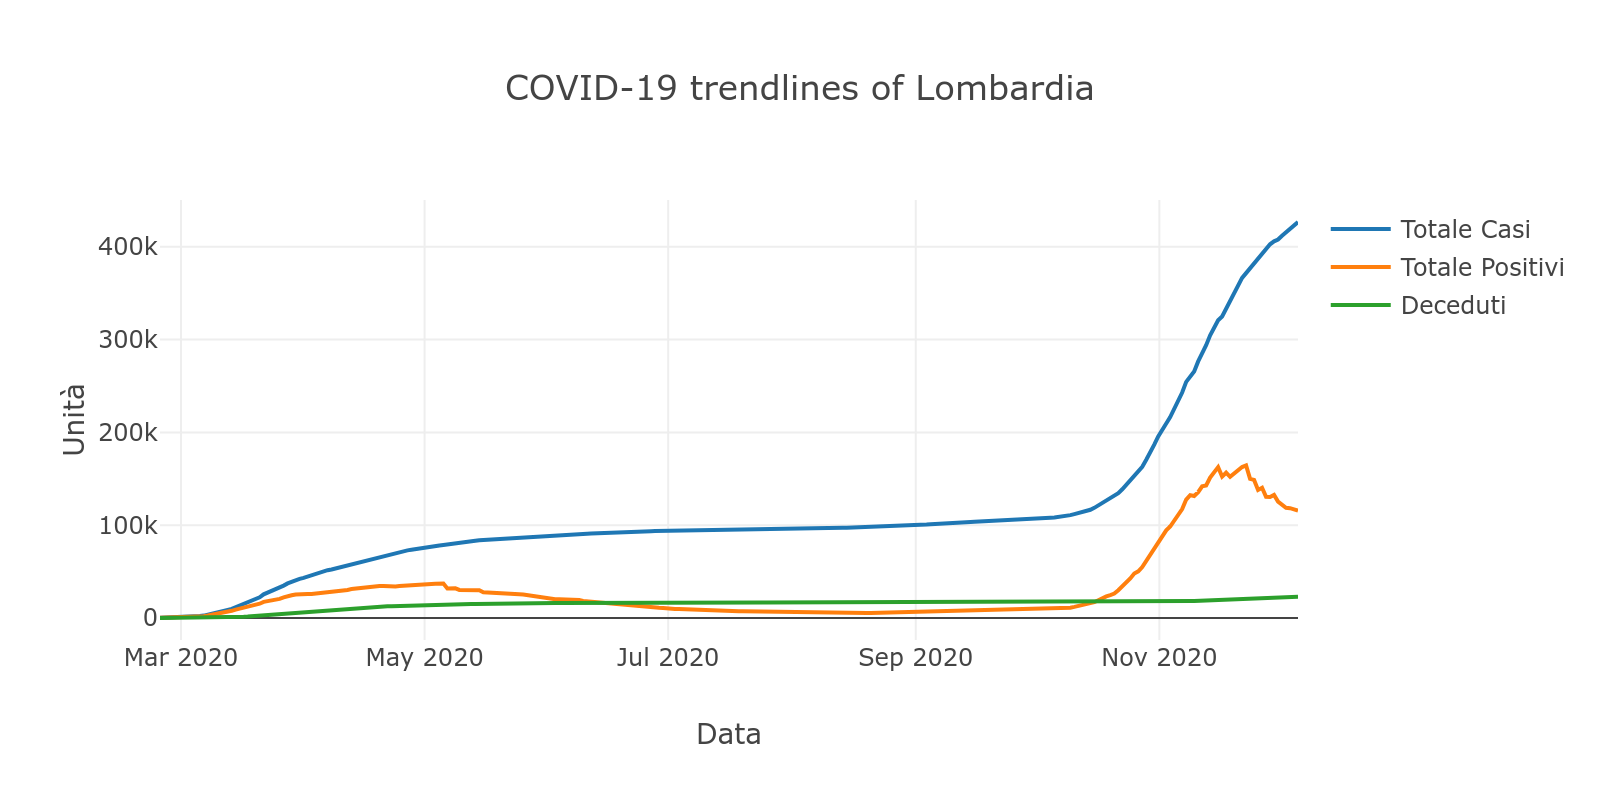

In [14]:
inter_dropdown_plot(options=dpc_regioni_df.denominazione_regione.unique(), 
                    default_value='Lombardia', 
                    dropdown_label='Regione',
                    y=['totale_casi', 'totale_positivi', 'deceduti'],
                    legend_titles=['Totale Casi', 'Totale Positivi', 'Deceduti'],
                    data=dpc_regioni_df,
                    group_column='denominazione_regione',
                    x='data',
                    title='COVID-19 trendlines of ',
                    xtitle='Data',
                    ytitle='Unità',
                    output_image=True)

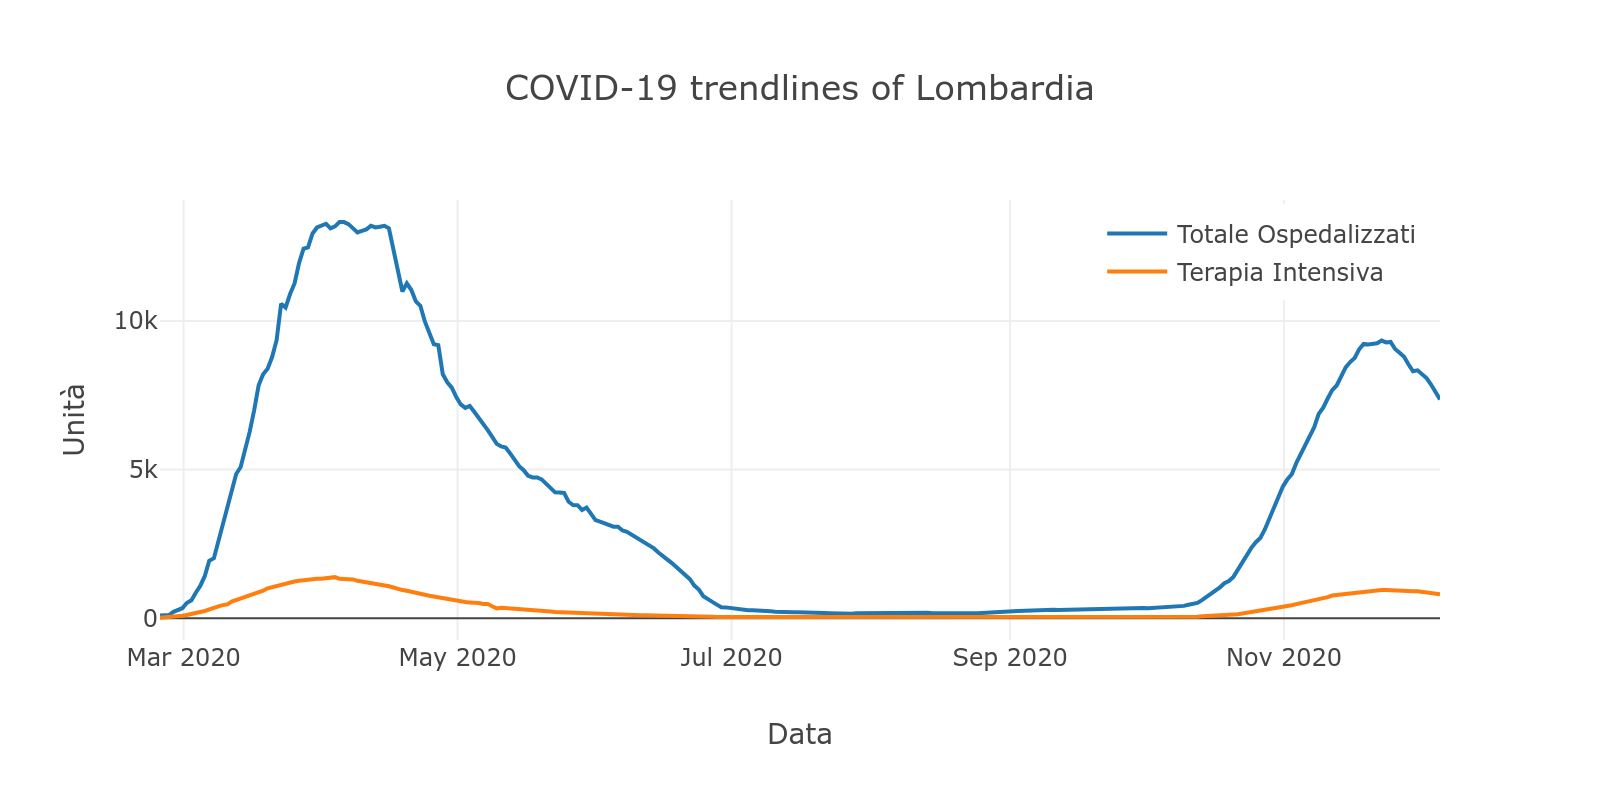

In [15]:
inter_dropdown_plot(options=dpc_regioni_df.denominazione_regione.unique(), 
                    default_value='Lombardia', 
                    dropdown_label='Regione',
                    y=['totale_ospedalizzati', 'terapia_intensiva'],
                    legend_titles=['Totale Ospedalizzati', 'Terapia Intensiva'],
                    data=dpc_regioni_df,
                    group_column='denominazione_regione',
                    x='data',
                    title='COVID-19 trendlines of ',
                    xtitle='Data',
                    ytitle='Unità',
                    output_image=True,
                    blend_legend=True)

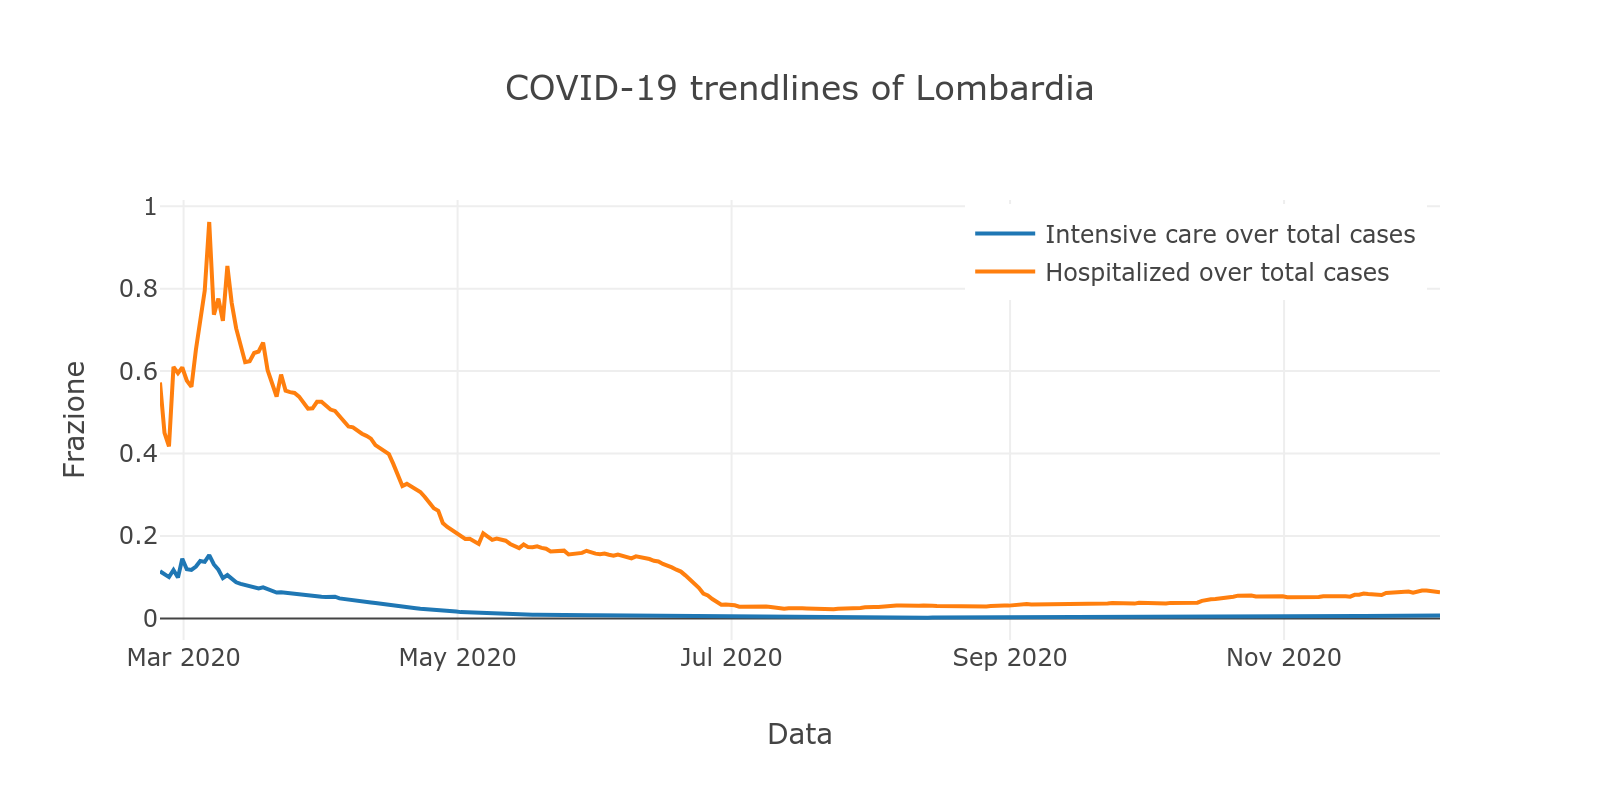

In [16]:
inter_dropdown_plot(options=dpc_regioni_df.denominazione_regione.unique(), 
                    default_value='Lombardia', 
                    dropdown_label='Regione',
                    y=['IC_R', 'Hosp_R'],
                    legend_titles=['Intensive care over total cases', 'Hospitalized over total cases'],
                    data=dpc_regioni_df,
                    group_column='denominazione_regione',
                    x='data',
                    title='COVID-19 trendlines of ',
                    xtitle='Data',
                    ytitle='Frazione',
                    output_image=True,
                    blend_legend=True)

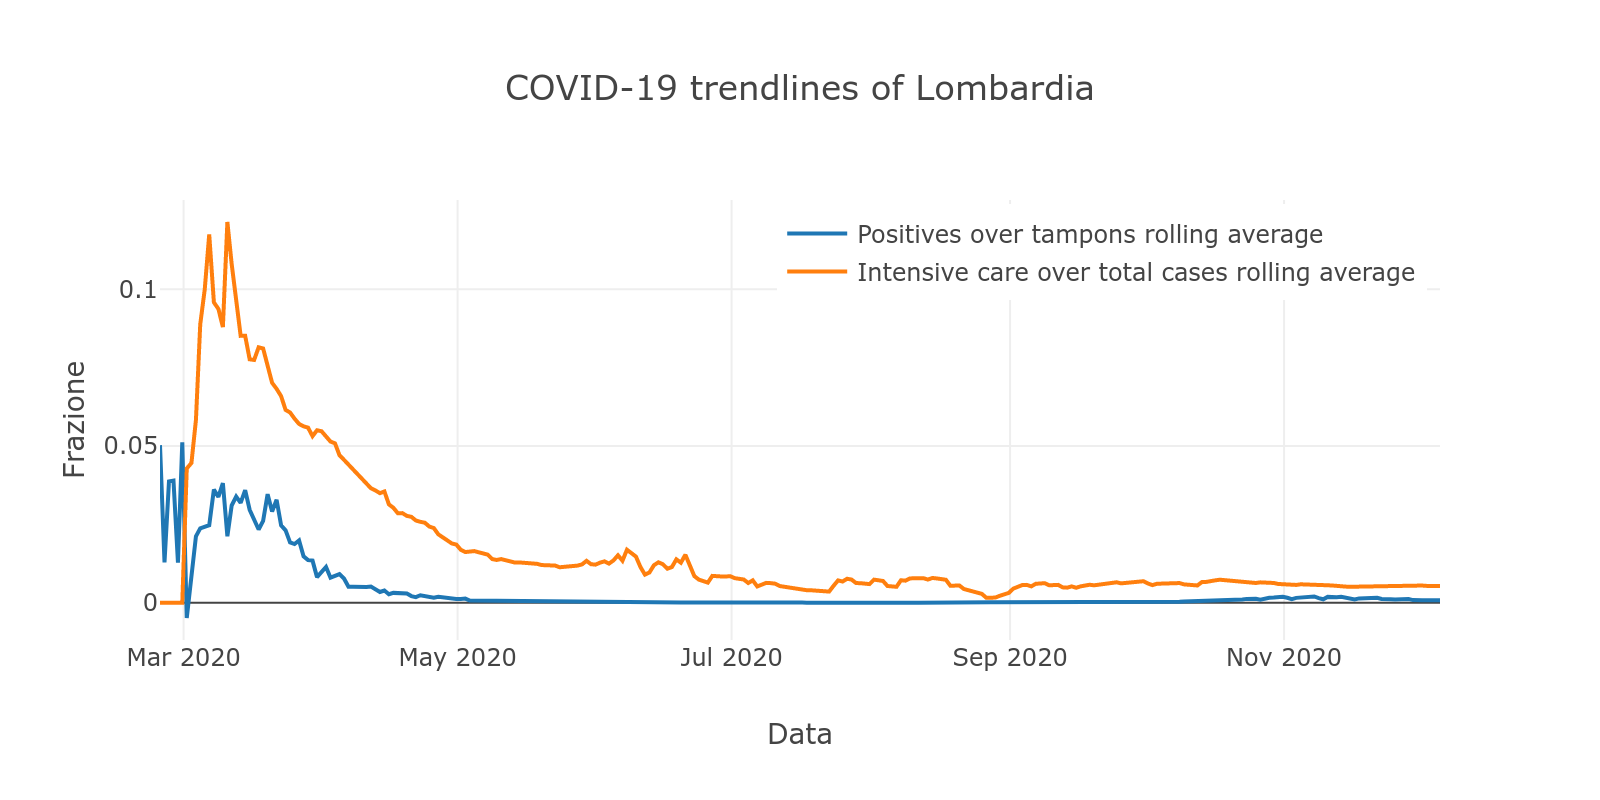

In [17]:
inter_dropdown_plot(options=dpc_regioni_df.denominazione_regione.unique(), 
                    default_value='Lombardia', 
                    dropdown_label='Regione',
                    y=['NC_R_Rolling', 'IC_R_Rolling'],
                    legend_titles=['Positives over tampons rolling average', 'Intensive care over total cases rolling average'],
                    data=dpc_regioni_df,
                    group_column='denominazione_regione',
                    x='data',
                    title='COVID-19 trendlines of ',
                    xtitle='Data',
                    ytitle='Frazione',
                    output_image=True,
                    blend_legend=True)

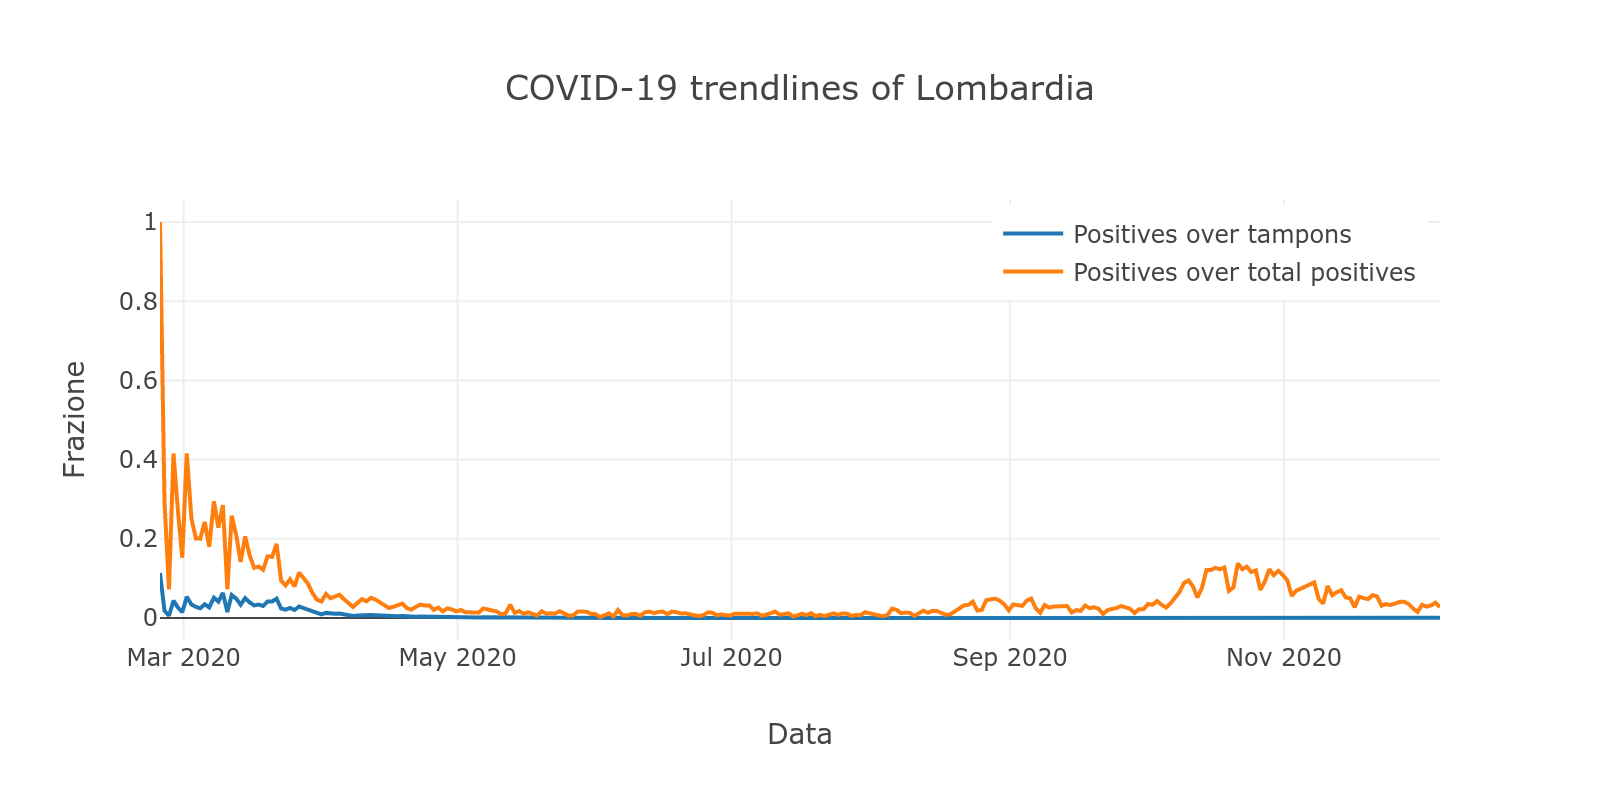

In [18]:
inter_dropdown_plot(options=dpc_regioni_df.denominazione_regione.unique(), 
                    default_value='Lombardia', 
                    dropdown_label='Regione',
                    y=['NC_R', 'NP_R'],
                    legend_titles=['Positives over tampons', 'Positives over total positives'],
                    data=dpc_regioni_df,
                    group_column='denominazione_regione',
                    x='data',
                    title='COVID-19 trendlines of ',
                    xtitle='Data',
                    ytitle='Frazione',
                    output_image=True,
                    blend_legend=True)

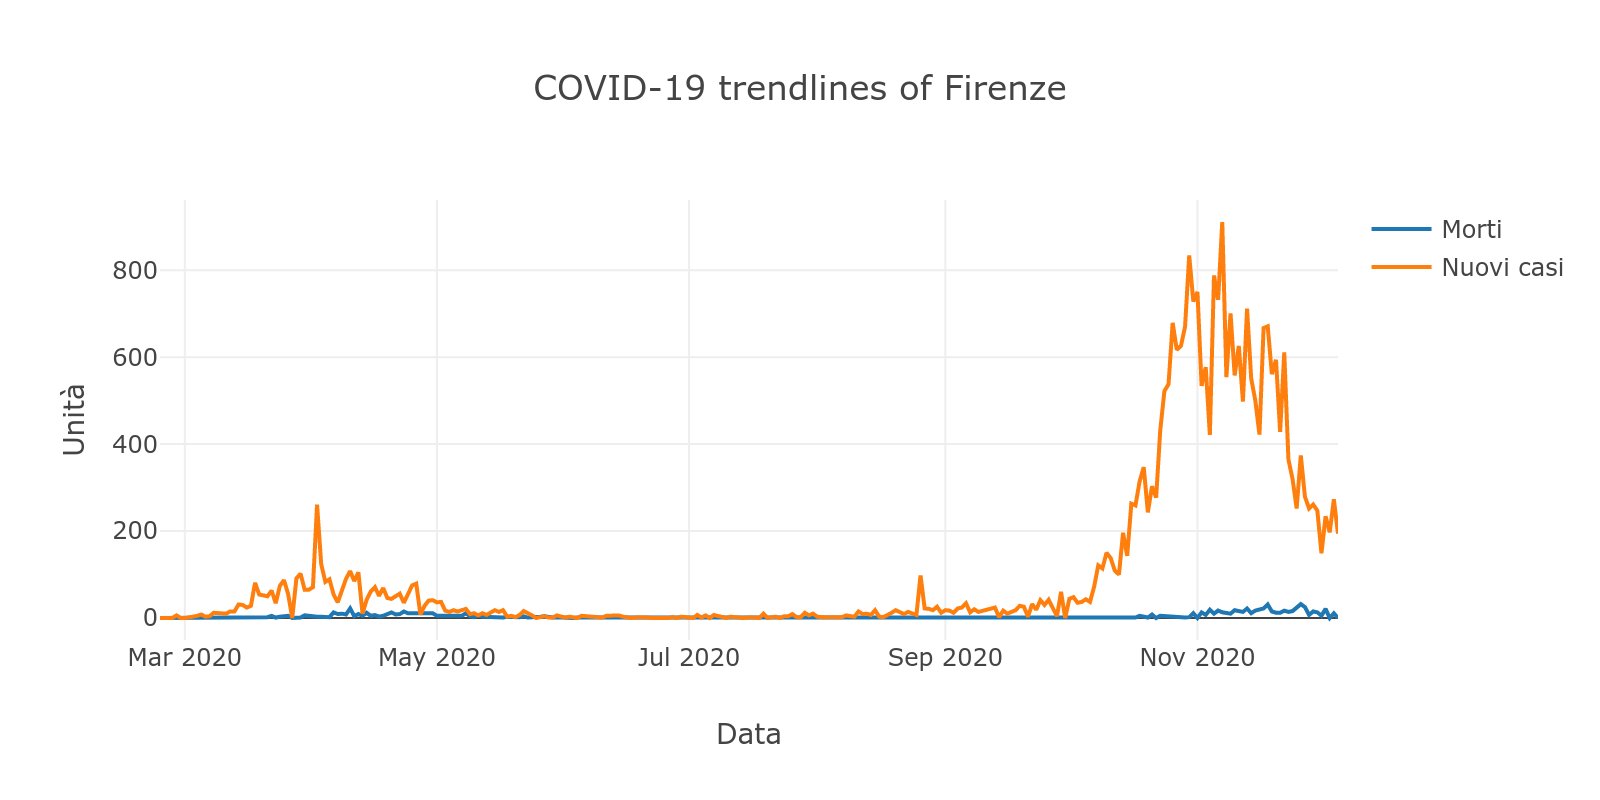

In [19]:
inter_dropdown_plot(options=covidpro_df['Province'].unique(), 
                    default_value='Firenze', 
                    dropdown_label='Provincia',
                    y=['Deaths', 'New_cases'],
                    legend_titles=['Morti', 'Nuovi casi'],
                    data=covidpro_df,
                    group_column='Province',
                    x='Date',
                    title='COVID-19 trendlines of ',
                    xtitle='Data',
                    ytitle='Unità',
                    output_image=True,
                    blend_legend=False)

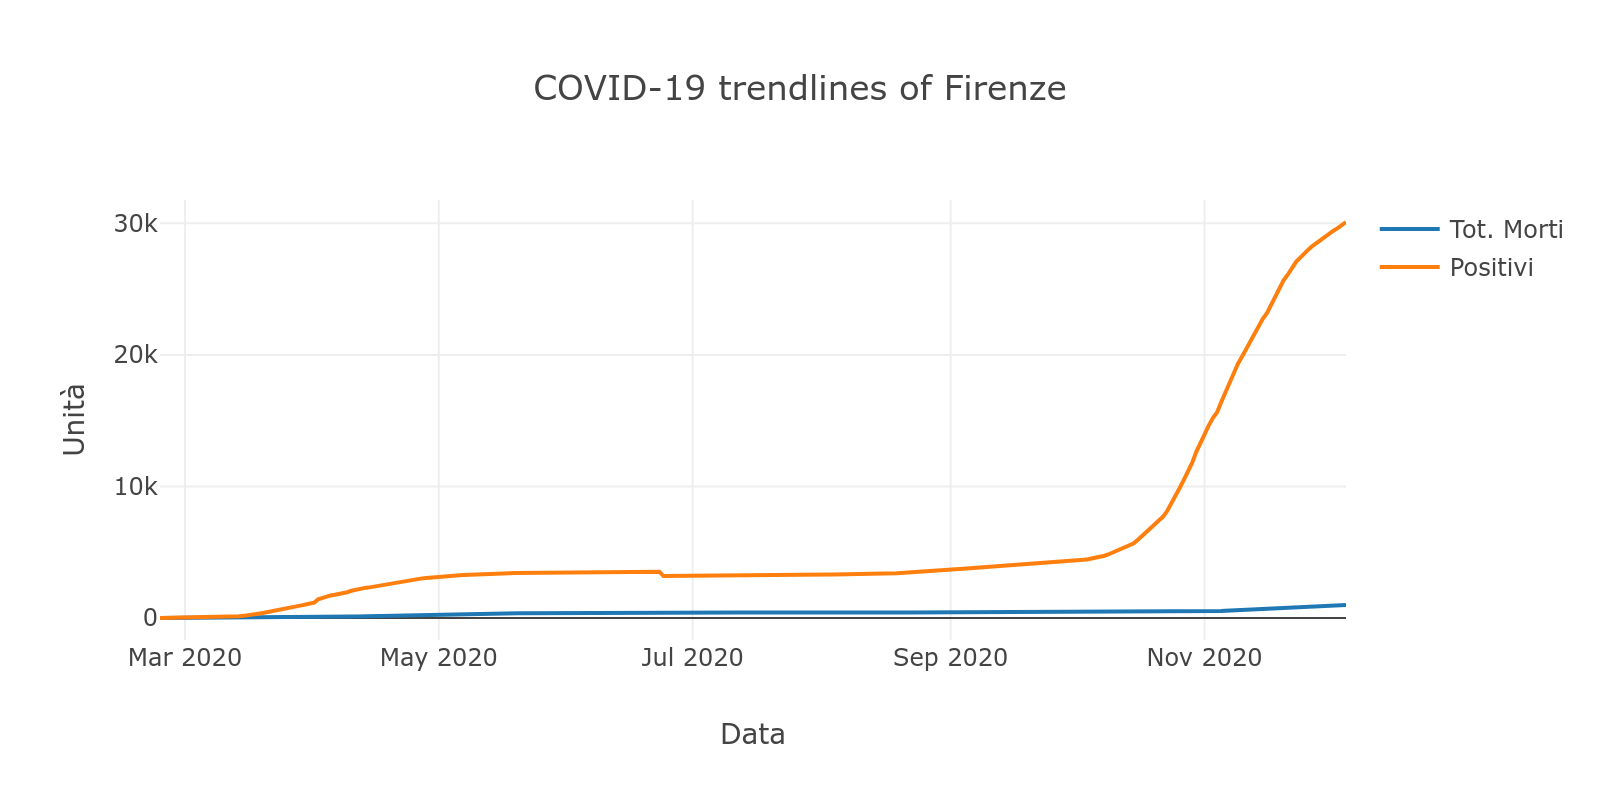

In [20]:
inter_dropdown_plot(options=covidpro_df.Province.unique(), 
                    default_value='Firenze', 
                    dropdown_label='Provincia',
                    y=['Tot_deaths', 'Curr_pos_cases'],
                    legend_titles=['Tot. Morti', 'Positivi'],
                    data=covidpro_df,
                    group_column='Province',
                    x='Date',
                    title='COVID-19 trendlines of ',
                    xtitle='Data',
                    ytitle='Unità',
                    output_image=True,
                    blend_legend=False)

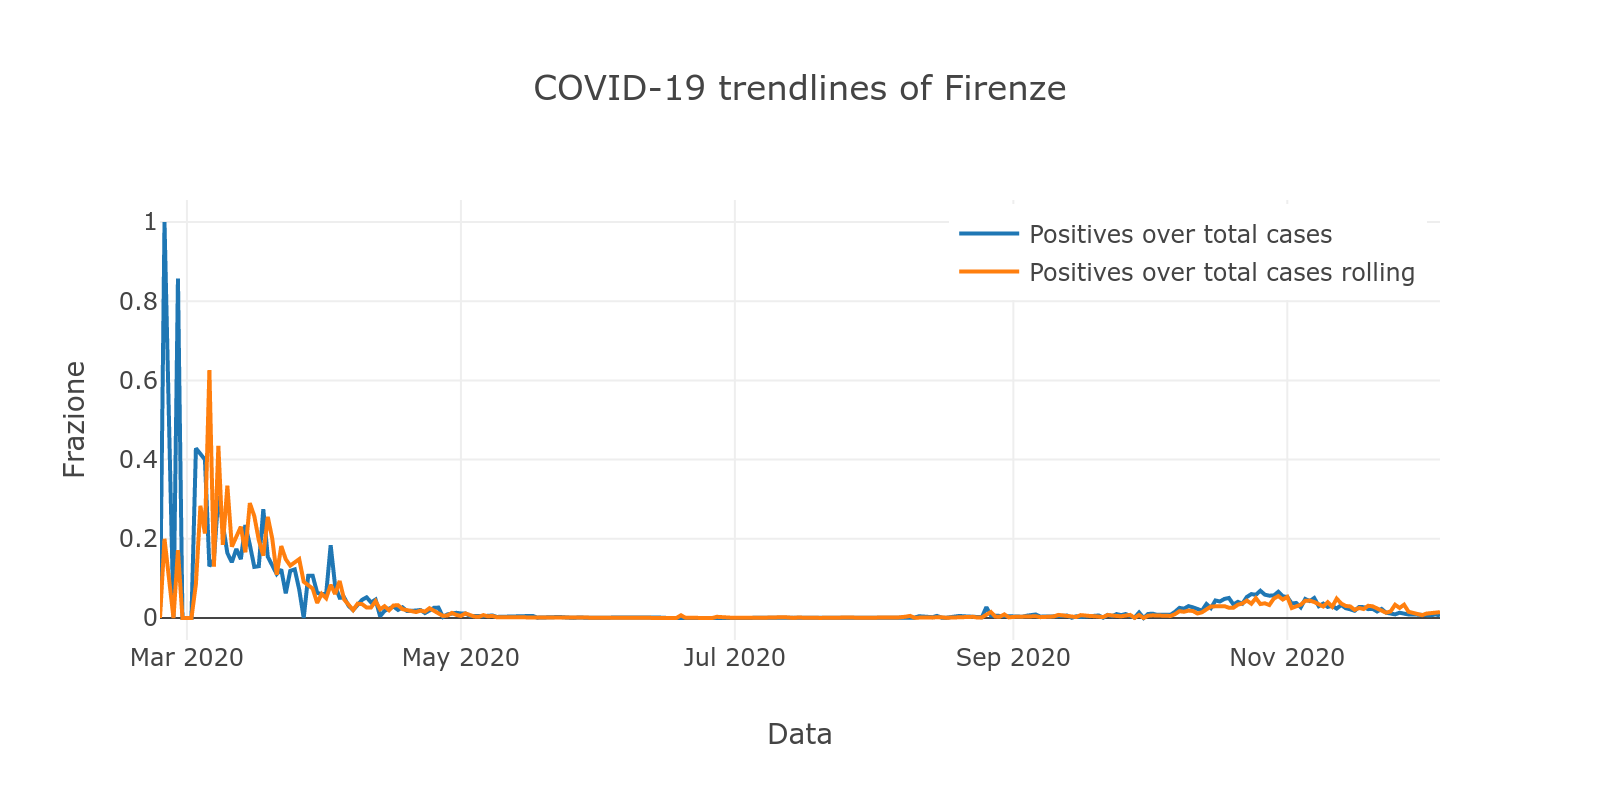

In [21]:
inter_dropdown_plot(options=covidpro_df['Province'].unique(), 
                    default_value='Firenze', 
                    dropdown_label='Provincia',
                    y=['NP_R', 'NP_R_Rolling'],
                    legend_titles=['Positives over total cases', 'Positives over total cases rolling'],
                    data=covidpro_df,
                    group_column='Province',
                    x='Date',
                    title='COVID-19 trendlines of ',
                    xtitle='Data',
                    ytitle='Frazione',
                    output_image=True,
                    blend_legend=True)

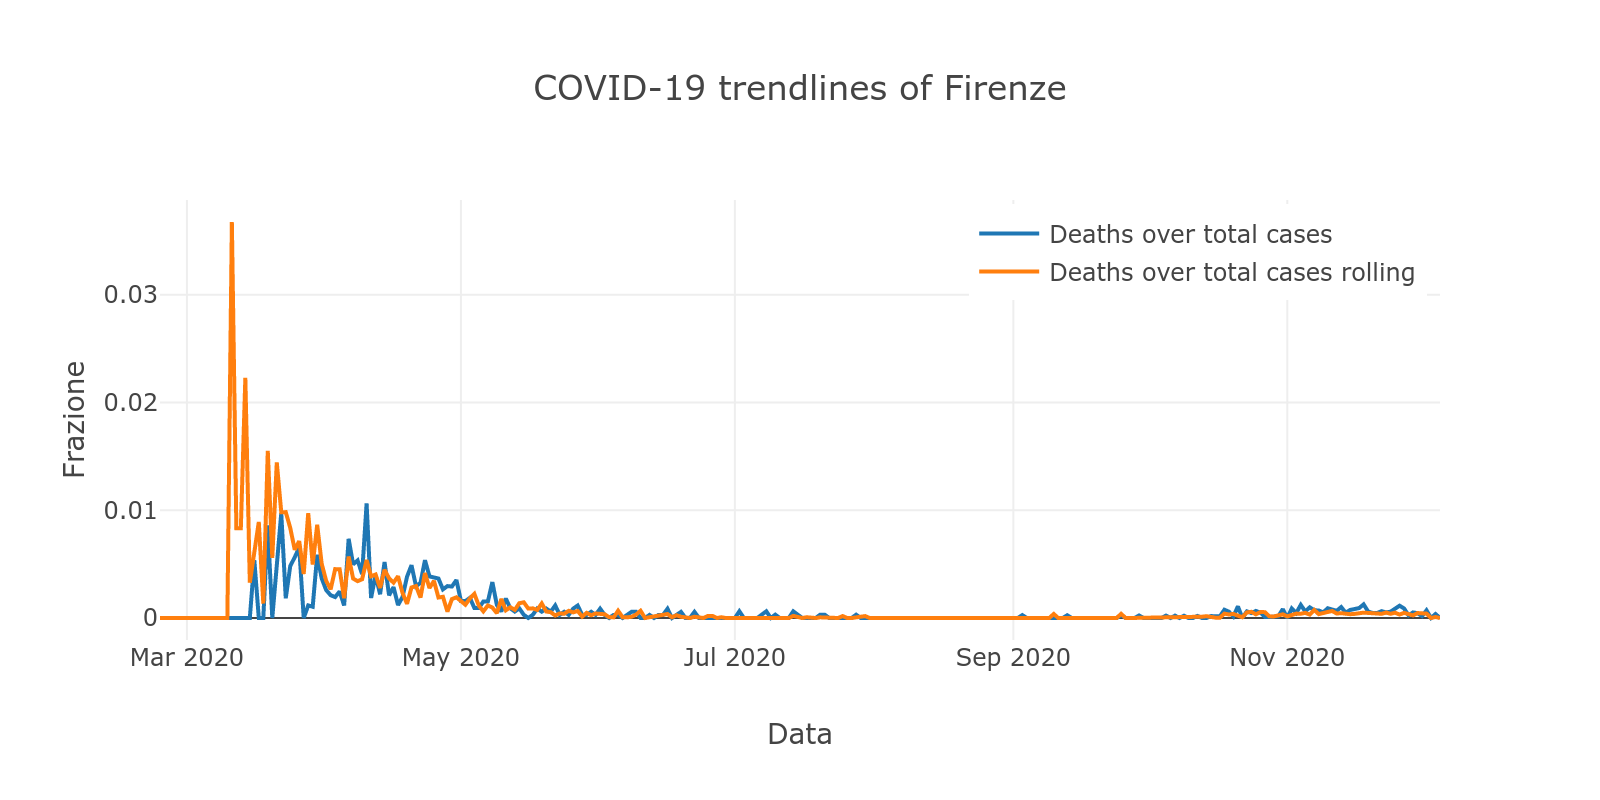

In [22]:
inter_dropdown_plot(options=covidpro_df['Province'].unique(), 
                    default_value='Firenze', 
                    dropdown_label='Provincia',
                    y=['DR', 'DR_Rolling'],
                    legend_titles=['Deaths over total cases', 'Deaths over total cases rolling'],
                    data=covidpro_df,
                    group_column='Province',
                    x='Date',
                    title='COVID-19 trendlines of ',
                    xtitle='Data',
                    ytitle='Frazione',
                    output_image=True,
                    blend_legend=True)